In [1]:
import pandas as pd

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
reviews_df_1 = pd.read_excel("正負無效句訓練.xlsx")
reviews_df_1 = reviews_df_1.iloc[1: , :]
reviews_df_1['labels'] = reviews_df_1['Unnamed: 2'].replace({'正面':1, '負面': 0, '無效':2})
reviews_df_1['reviews'] = reviews_df_1['Unnamed: 1']
reviews_df_1 = reviews_df_1[['reviews', 'labels']]

In [3]:
reviews_df_2 = pd.read_excel("正負無效句訓練2.xlsx")
reviews_df_2['labels'] = reviews_df_2['0731new(0：負評，1：正評，2：無效)'].replace({'1':1, '0': 0, '2':2})
reviews_df_2['reviews'] = reviews_df_2['comment_message']
reviews_df_2 = reviews_df_2[['reviews', 'labels']]
reviews_df_2 = reviews_df_2.dropna()
reviews_df_2['labels'] = reviews_df_2['labels'].astype('int')

In [4]:
reviews_df_1

,reviews,labels
1,作者robinlee528 (羅賓 Robin)看板Hotel標題[心得] 台中 承億文旅-...,2
2,作者terry910134 (懶人愛吃喝)看板Hotel標題[心得] 屏東 承億文旅 墾丁雅...,2
3,作者terry910134 (懶人愛吃喝)看板Hotel標題[心得] 花蓮 承億文旅 客房硬...,0
4,作者yajuyeh (Shopping Heaven)看板Hotel標題[心得]『花蓮』承億...,2
5,作者yajuyeh (Shopping Heaven)看板Hotel標題[心得]『嘉義』承億...,2
...,...,...
847,›,2
848,›,2
849,›,2
850,›,2


In [5]:
reviews_df_2

,reviews,labels
0,請問住宿優惠只能實體購買嗎？謝謝,2
1,請問餐券是紙本的嗎？,2
2,超期待😚！,1
3,倒數三天😍,2
4,好有藝術氣息,1
...,...,...
4259,0,2
4264,0,2
4265,蘇家榆 我想去 我想去,2
4266,Marie Liu Rita Lin 走了啦～一起來住有全球唯一高空懸挑無邊際泳池的高雄承億酒店😍,1


In [6]:
reviews_df_1.shape

(851, 2)

In [7]:
reviews_df_1.dtypes

reviews    object
labels      int64
dtype: object

In [8]:
reviews_df_2.shape

(3071, 2)

In [9]:
reviews_df_2.dtypes

reviews    object
labels      int64
dtype: object

In [10]:
reviews_df=pd.concat([reviews_df_1,reviews_df_2])

In [15]:
reviews_df.dtypes

reviews    object
labels      int64
dtype: object

<Axes: >

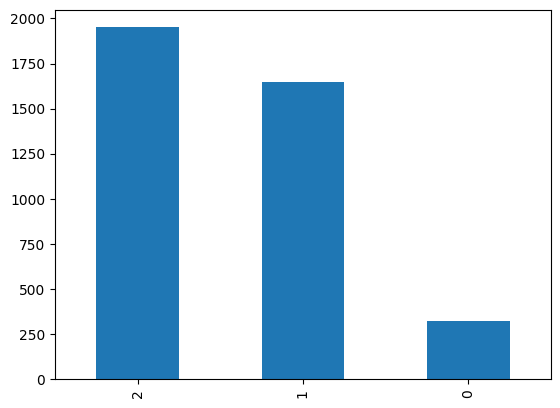

In [11]:
reviews_df['labels'].value_counts().plot(kind='bar')

In [12]:
bad_df = reviews_df[reviews_df['labels'] ==0]
bad_df.shape

(324, 2)

In [13]:
good_df = reviews_df[reviews_df['labels'] ==1]
good_df.shape

(1648, 2)

In [14]:
invalid_df = reviews_df[reviews_df['labels'] ==2]
invalid_df.shape

(1950, 2)

In [16]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(reviews_df, test_size = 0.2, random_state = 927)

In [17]:
train_df

,reviews,labels
843,›,2
523,Artem Is,2
223,看成休假上班，想說這麼熱血嗎😂😂,2
1000,王維碩 gogo,1
4241,0,0
...,...,...
35,詳細圖文網誌：https://alina28.pixnet.net/blog/post/47...,2
278,嘉義舊市區蠻適合騎腳踏車的，騎著腳踏車去找美食很方便，飯店可提供租借喔。,1
449,訂金只能用ATM匯款很不方便欸,0
1046,周邵錩 我覺得答案是墾丁丶南投丶嘉義丶淡水,2


In [18]:
test_df

,reviews,labels
725,陳宥碩冠軍賽要不要訂一下,2
3934,請問住宿劵，寒暑假一到四使用，是否另外加價？,2
2932,李祈慧 江庭瑩 一起來捕捉承億吧！,2
3683,抽！,2
2640,好美，餐點也看起來很厲害,1
...,...,...
2092,很好吃，不過上次去吃第一輪就感覺沒在補了，很失望@@,1
3106,汪麥可,2
938,李瑋萱【一起來去承億，一秒穿越到北宋！】,1
28,"※ 編輯: kevin1213 (118.167.137.110 臺灣), 05/09/20...",2


In [19]:
from simpletransformers.classification import ClassificationModel
#?ClassificationModel
model = ClassificationModel('bert', 'hfl/chinese-bert-wwm-ext', num_labels=3, use_cuda=False)
model.train_model(train_df, args = {'overwrite_output_dir': False})

Some weights of the model checkpoint at hfl/chinese-bert-wwm-ext were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkp

  0%|          | 0/3137 [00:00<?, ?it/s]

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/393 [00:00<?, ?it/s]

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


(393, 0.5273166339721237)

In [20]:
result, model_output, wrong_predictions = model.eval_model(test_df)
result

/Users/jordanfan/opt/anaconda3/envs/simpletransformers/lib/python3.11/site-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/785 [00:00<?, ?it/s]

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Running Evaluation:   0%|          | 0/99 [00:00<?, ?it/s]

{'mcc': 0.7010817120218074, 'eval_loss': 0.4396804814048187}

In [21]:
wrong_predictions

[{'guid': 2, 'text_a': '李祈慧 江庭瑩 一起來捕捉承億吧！', 'text_b': None, 'label': 2},
 {'guid': 10, 'text_a': '8/2號 訂房 到現在  請問 訂金 到底要確認收到沒???????????????', 'text_b': None, 'label': 0},
 {'guid': 15, 'text_a': '8888 debug大隊', 'text_b': None, 'label': 1},
 {'guid': 21, 'text_a': '我等了一百多天了呢', 'text_b': None, 'label': 2},
 {'guid': 41, 'text_a': '哪天哪天😍😍😍', 'text_b': None, 'label': 1},
 {'guid': 49, 'text_a': '🥰', 'text_b': None, 'label': 2},
 {'guid': 78, 'text_a': '我也是周一吃早餐的', 'text_b': None, 'label': 2},
 {'guid': 80, 'text_a': '懷舊老街', 'text_b': None, 'label': 1},
 {'guid': 85, 'text_a': '陳楷鏞 好想去 好想去', 'text_b': None, 'label': 1},
 {'guid': 91, 'text_a': '想請教 近期住過這兩間的版友們的住宿經驗如何？ 或者版友們的其他建議如何？', 'text_b': None, 'label': 0},
 {'guid': 95, 'text_a': '歡迎落腳高雄', 'text_b': None, 'label': 2},
 {'guid': 99, 'text_a': '非常期待，吃喝玩樂食宿超方便', 'text_b': None, 'label': 2},
 {'guid': 100, 'text_a': '[心得] 花蓮 承億輕旅花蓮館 近花蓮火車站 - 看板 Hotel - 批踢踢實業坊', 'text_b': None, 'label': 1},
 {'guid': 102, 'text_a': '可惜沒機會入住 因為少了想一起入住的人', 

In [22]:
predictions, raw_outputs = model.predict(["返回看板"])

  0%|          | 0/1 [00:00<?, ?it/s]

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  0%|          | 0/1 [00:00<?, ?it/s]

In [23]:
predictions, raw_outputs

(array([2]), array([[-1.73732722, -1.31275749,  2.97749186]]))

In [24]:
predictions, raw_outputs = model.predict(["批踢踢實業坊"])
print(predictions, raw_outputs)

  0%|          | 0/1 [00:00<?, ?it/s]

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  0%|          | 0/1 [00:00<?, ?it/s]

[2] [[-2.38299966 -1.09384716  3.08790612]]


In [25]:
predictions, raw_outputs = model.predict(["看板 Hotel"])
print(predictions, raw_outputs)

  0%|          | 0/1 [00:00<?, ?it/s]

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  0%|          | 0/1 [00:00<?, ?it/s]

[2] [[-2.17934942 -0.48965362  2.66915941]]


In [26]:
predictions, raw_outputs = model.predict(["[心得]『花蓮』承億文旅 花蓮山知道 - 看板 Hotel - 批踢踢實業坊"])
print(predictions, raw_outputs)

  0%|          | 0/1 [00:00<?, ?it/s]

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  0%|          | 0/1 [00:00<?, ?it/s]

[2] [[-2.47247267 -0.68931413  3.18780804]]


In [27]:
predictions, raw_outputs = model.predict(["※ 文章網址: https://www.ptt.cc/bbs/Hotel/M.1520174622.A.C0C.html"])
print(predictions, raw_outputs)

  0%|          | 0/1 [00:00<?, ?it/s]

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  0%|          | 0/1 [00:00<?, ?it/s]

[2] [[-2.03892732 -1.45114982  3.40002394]]


In [28]:
predictions, raw_outputs = model.predict(["作者SSCI95 (Be the One)看板Hotel標題[請益] 高雄 漢來vs承億酒店時間Fri Dec 23 08:50:01 2022"])
print(predictions, raw_outputs)

  0%|          | 0/1 [00:00<?, ?it/s]

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  0%|          | 0/1 [00:00<?, ?it/s]

[2] [[-1.56739247 -1.59126449  3.14962721]]


In [29]:
predictions, raw_outputs = model.predict(["住宿地點還不錯，騎自行車過去，還有地放放置我的自行車，讚"])
print(predictions, raw_outputs)


  0%|          | 0/1 [00:00<?, ?it/s]

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  0%|          | 0/1 [00:00<?, ?it/s]

[1] [[-1.78799522  2.73965883 -1.21996403]]


In [30]:
predictions, raw_outputs = model.predict(["房間很棒，讓人放鬆，下次還會願意選擇這裡"])
print(predictions, raw_outputs)

  0%|          | 0/1 [00:00<?, ?it/s]

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  0%|          | 0/1 [00:00<?, ?it/s]

[1] [[-2.23757839  2.75786614 -1.12318349]]


In [31]:
predictions, raw_outputs = model.predict(["承億價格不符"])
print(predictions, raw_outputs)

  0%|          | 0/1 [00:00<?, ?it/s]

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  0%|          | 0/1 [00:00<?, ?it/s]

[0] [[ 1.0680896  -1.08189273  0.39942449]]


In [32]:
predictions, raw_outputs = model.predict(["單純不論價格的話選承億 但承億那價格太離譜"])
print(predictions, raw_outputs)

  0%|          | 0/1 [00:00<?, ?it/s]

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  0%|          | 0/1 [00:00<?, ?it/s]

[0] [[ 2.66620183 -0.9918648  -0.86844993]]


In [33]:
predictions, raw_outputs = model.predict(["嘉義舊市區蠻適合騎腳踏車的，騎著腳踏車去找美食很方便，飯店可提供租借喔"])
print(predictions, raw_outputs)

  0%|          | 0/1 [00:00<?, ?it/s]

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  0%|          | 0/1 [00:00<?, ?it/s]

[1] [[-1.81393862  2.5613277  -1.05347538]]


In [34]:
predictions, raw_outputs = model.predict(["李瑋萱【一起來去承億，一秒穿越到北宋！】"])
print(predictions, raw_outputs)

  0%|          | 0/1 [00:00<?, ?it/s]

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  0%|          | 0/1 [00:00<?, ?it/s]

[2] [[-3.35809112  0.73472756  2.27117157]]


In [36]:
predictions, raw_outputs = model.predict(["對於嚴重損害Norin著作權，台中鳳凰酒店指出，將撤除親子客房壁紙"])
print(predictions, raw_outputs)

  0%|          | 0/1 [00:00<?, ?it/s]

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  0%|          | 0/1 [00:00<?, ?it/s]

[0] [[ 2.15613556 -1.10396349 -0.66159523]]


In [ ]:
predictions, raw_outputs = model.predict([""])
print(predictions, raw_outputs)

In [ ]:
predictions, raw_outputs = model.predict([""])
print(predictions, raw_outputs)

In [ ]:
predictions, raw_outputs = model.predict([""])
print(predictions, raw_outputs)

In [ ]:
predictions, raw_outputs = model.predict([""])
print(predictions, raw_outputs)